In [1]:
function Potential(x::Number, y::Number)
    s1, s2 = 0.707^2, 0.582^2
    -2/√(s1 + x^2) - 2/√(s1 + y^2)+ 1/√(s2 + (x-y)^2)
end

Potential (generic function with 1 method)

In [2]:
function CheckPotential(x::Array{Float64, 1})
    X = repmat(x,1,ns) 

    V = map(Potential, X, X')
    imshow(V, origin="lower", extent=[minimum(x), maximum(x), minimum(x), maximum(x)])
#     imshow(abs(V), origin="lower")

    xlabel("\$x_{1}\$"); ylabel("\$x_{2}\$")
    colorbar()
    println("maximum of V is $(maximum(V))")
end

CheckPotential (generic function with 1 method)

In [3]:
function csm(ns::Int64, dx::Float64, q::Complex128, V::Array{Complex128, 2})
    H = spzeros(Complex128, ns*ns, ns*ns)
    a11 = 5/4dx^2 /q^2 * 2
    a12 = -2/3dx^2 / q^2
    a13 = 1/24dx^2 / q^2
    shape = size(H)
    
    H[sub2ind(shape, 1+2ns : ns*ns    , 1     : (ns-2)*ns)] = a13
    H[sub2ind(shape, 1+ns  : ns*ns    , 1     : (ns-1)*ns)] = a12
    H[sub2ind(shape, 3     : ns*ns    , 1     : ns*ns-2  )] = a13
    H[sub2ind(shape, 2     : ns*ns    , 1     : ns*ns-1  )] = a12
    H[sub2ind(shape, 1     : ns*ns    , 1     : ns*ns    )] = a11+ V
    H[sub2ind(shape, 1     : ns*ns-1  , 2     : ns*ns    )] = a12
    H[sub2ind(shape, 1     : ns*ns-2  , 3     : ns*ns    )] = a13
    H[sub2ind(shape, 1     : (ns-1)*ns, 1+ns  : ns*ns    )] = a12
    H[sub2ind(shape, 1     : (ns-2)*ns, 1+2ns : ns*ns    )] = a13
    println("nnz=$(nnz(H))")
    
    eigs(H; nev=100, which=:SR, ritzvec=false)
end

csm (generic function with 1 method)

In [4]:
function He(ns::Int64, dx::Float64)
    x = linspace(-ns/2, ns/2, ns)*dx
    for i in 1:2
        θ = i*0.15
        q = e^(im*θ)
        xwork = x
        Xwork = repmat(xwork, 1, ns) 

        Vwork = map(Potential, Xwork*q, Xwork'*q)

        @time E, nconv, niter, nmult = csm(ns, dx, q, Vwork) 
    
        println("nconv=$(nconv)")
        println("niter=$(niter)")
        println("nmult=$(nmult)")

        println("minimum=$(minimum(real(E)))")
        save("data/e$(i).jld", "E", E)
        plot(real(E), imag(E), ".")
    end
    xlim([-3, 0]); ylim([-2.0, 0.02])
    xlabel("Re(E)"); ylabel("Im(E)")
    grid()
    show()
    nothing
end

He (generic function with 1 method)

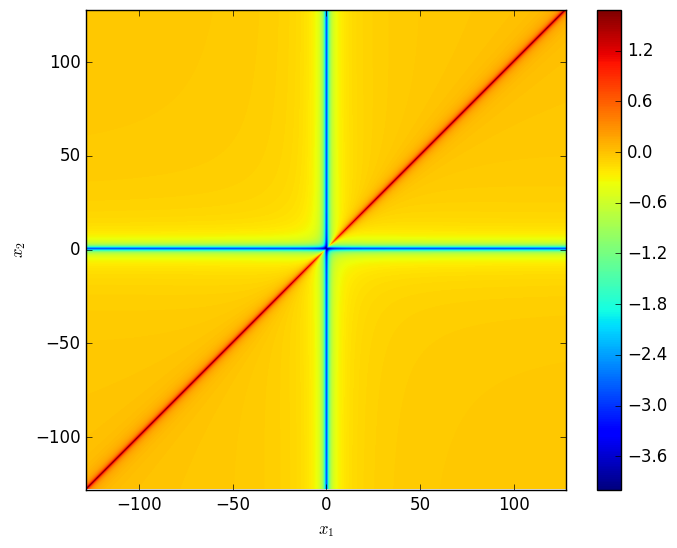

maximum of V is 1.6869635351014904


In [6]:
using PyPlot
using JLD
const ns = 2^10
const dx = 0.25
x = linspace(-ns/2, ns/2, ns)*dx
# @time He(ns, dx)
CheckPotential(Array(x))